In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

#physical_devices = tf.config.list_physical_devices("GPU")
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, 3, padding="valid", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)



model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=3e-4),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)


170500096/170498071 [==============================] - 2s 0us/step
Epoch 1/5
782/782 [==============================] - 64s 82ms/step - loss: 1.6644 - accuracy: 0.3930
Epoch 2/5
782/782 [==============================] - 64s 81ms/step - loss: 1.3438 - accuracy: 0.5196
Epoch 3/5
782/782 [==============================] - 66s 85ms/step - loss: 1.2118 - accuracy: 0.5698
Epoch 4/5
782/782 [==============================] - 66s 84ms/step - loss: 1.1128 - accuracy: 0.6119
Epoch 5/5
782/782 [==============================] - 64s 81ms/step - loss: 1.0313 - accuracy: 0.6400
157/157 - 3s - loss: 1.0367 - accuracy: 0.6356


[1.036651849746704, 0.6355999708175659]

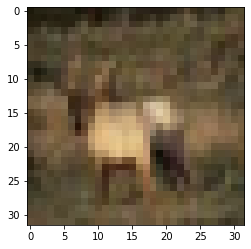

In [ ]:
import imageio
import matplotlib.pyplot as plt
plt.imshow(x_train[3])